<a href="https://colab.research.google.com/github/Poorya0071/Regression-machine-learning-and-deep-learning/blob/master/Car_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [54]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# remove missing data

In [55]:
df = raw_dataset.dropna()

# Shuffle the dataset

In [56]:
df = df.sample(frac = 1, random_state=42).reset_index()

In [57]:
df.drop('index', axis =1, inplace = True)

In [85]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import train_test_split

# Scale data and map the origin column and split dataset

In [86]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Cylinders", "Displacement", "Horsepower","Weight","Acceleration","Model Year"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Origin"])
)

# Create X & y
X = df.drop("MPG", axis=1)
y = df["MPG"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# DNN model

In [125]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),


])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mae'])
model_history = model.fit(X_train_normal, y_train, epochs = 100, verbose = 0,
                          validation_data = (X_test_normal, y_test))

In [126]:
model.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.7788 - mae: 1.7788


[1.7788126468658447, 1.7788126468658447]

In [127]:
y_pred = model.predict(X_test_normal)

3/3 [==============================] - 0s 4ms/step


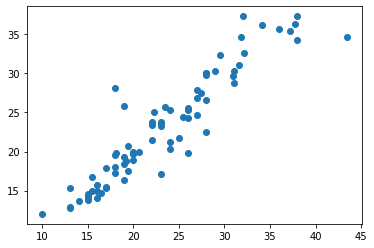

In [131]:
plt.scatter(y_test, y_pred)

In [143]:
prediction = pd.DataFrame()
prediction['real'] = y_test
prediction['prediction'] = y_pred
prediction = prediction.reset_index()

In [144]:
prediction.drop('index' , axis = 1,inplace=True)

In [145]:
prediction['accuracy']= 1 - np.abs(prediction['real'] - prediction['prediction'])/prediction['real']

In [148]:
prediction['accuracy'].describe()

count    79.000000
mean      0.921254
std       0.084995
min       0.439198
25%       0.904064
50%       0.938215
75%       0.973145
max       0.999061
Name: accuracy, dtype: float64

# RandomForest

In [152]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_normal, y_train)

RandomForestRegressor()

In [153]:
reg.score(X_test_normal,y_test)

0.8821159005027648

# Conclusion

the mean accuracy of our DNN model is 4 % better than the random forest base model.